# Airbnb on Housing Values
## Jonathan Eng

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("cleaned_airbnb_home_data.csv")
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AIRBNB_AMOUNT,HOME AMOUNT
0,NaN,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,NaN,D4,"27110 GRAND CENTRAL PARKWA, 27R",NaN,...,0,0,0,1972,2,D4,0,1/2/2013,0,25415
1,NaN,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,NaN,D4,"27010 GRAND CENTRAL PARKWA, 1-O",NaN,...,0,0,0,1972,2,D4,0,1/10/2013,0,25415
2,NaN,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,NaN,D4,"27110 GRAND CENTRAL PARKWA, 6J",NaN,...,0,0,0,1972,2,D4,0,1/24/2013,0,25415
3,NaN,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,NaN,D4,"26910 GRAND CENTRAL PARKWA, 5V",NaN,...,0,0,0,1972,2,D4,0,1/24/2013,0,25415
4,NaN,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,NaN,D4,"27110 GRAND CENTRAL PARKWA, 14L",NaN,...,0,0,0,1972,2,D4,0,1/2/2013,0,25415


## Cleaning Data 

In [4]:
df = df.drop(columns = ['BOROUGH', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
        'TOTAL UNITS', 'LAND SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 
        'TAX CLASS AT TIME OF SALE'])

In [5]:
#Quality of life changes to column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [6]:
percent_airbnb = (df.airbnb_amount / df.home_amount) * 100
df = df.assign(percent_airbnb = percent_airbnb)
df = df.drop(columns = ['airbnb_amount', 'home_amount'])
df = df[df.percent_airbnb < 100]  

In [7]:
#Combines individual years into decades 

#Homes built before 1800 are removed
df = df[df.year_built >= 1800]  

decade_built = np.where(
    (df.year_built >= 1800) & (df.year_built < 1810), "1800s", np.where( 
    (df.year_built >= 1810) & (df.year_built < 1820), "1810s", np.where( 
    (df.year_built >= 1820) & (df.year_built < 1830), "1820s", np.where( 
    (df.year_built >= 1830) & (df.year_built < 1840), "1830s", np.where( 
    (df.year_built >= 1840) & (df.year_built < 1850), "1840s", np.where( 
    (df.year_built >= 1850) & (df.year_built < 1860), "1850s", np.where( 
    (df.year_built >= 1860) & (df.year_built < 1870), "1860s", np.where( 
    (df.year_built >= 1870) & (df.year_built < 1880), "1870s", np.where( 
    (df.year_built >= 1880) & (df.year_built < 1890), "1880s", np.where( 
    (df.year_built >= 1890) & (df.year_built < 1900), "1890s", np.where( 
    (df.year_built >= 1900) & (df.year_built < 1920), "1910s", np.where( 
    (df.year_built >= 1910) & (df.year_built < 1920), "1910s", np.where( 
    (df.year_built >= 1920) & (df.year_built < 1930), "1920s", np.where( 
    (df.year_built >= 1930) & (df.year_built < 1940), "1930s", np.where( 
    (df.year_built >= 1940) & (df.year_built < 1950), "1940s", np.where( 
    (df.year_built >= 1950) & (df.year_built < 1960), "1950s", np.where( 
    (df.year_built >= 1960) & (df.year_built < 1970), "1960s", np.where( 
    (df.year_built >= 1970) & (df.year_built < 1980), "1970s", np.where( 
    (df.year_built >= 1980) & (df.year_built < 1990), "1980s", np.where( 
    (df.year_built >= 1990) & (df.year_built < 2000), "1990s", np.where( 
    (df.year_built >= 2000) & (df.year_built < 2010), "2000s", np.where( 
    (df.year_built >= 2010) & (df.year_built < 2020), "2010s", None))))))))))))))))))))))

df = df.assign(decade_built = decade_built)
df.decade_built = df.decade_built.astype('category')

df = df.drop(columns = ['year_built'])

In [8]:
#Remove Rows with Missing Data
df = df.dropna()

In [9]:
df.neighborhood = df.neighborhood.astype('category')
df.building_class_category = df.building_class_category.astype('category')
df.tax_class_at_present = df.tax_class_at_present.astype('category')

df.gross_square_feet = df.gross_square_feet.str.replace(',', "")
df.gross_square_feet = pd.to_numeric(df.gross_square_feet)

df.residential_units = pd.to_numeric(df.residential_units)
df.commercial_units = pd.to_numeric(df.commercial_units)

df.sale_date = pd.to_numeric( df.sale_date.str[-4:])
df = df.rename(columns = {"sale_date" : "sale_year"})
df.sale_year = df.sale_year.astype('category')

df.tax_class_at_present = df.tax_class_at_present.rename('tax_class', inplace = True)
df = df.rename(columns = {"tax_class_at_present" : "tax_class"})


In [10]:
#Changing sale_price and gross_square_feet to LOG10 to show percentage change to be more comparable 
df.sale_price = np.log(df.sale_price)
df = df.rename(columns = {"sale_price" : "log_sale_price"})

df.gross_square_feet = np.log(df.gross_square_feet)
df = df.rename(columns = {"gross_square_feet" : "log_gross_square_feet"})

In [11]:
#Remove NA's and negative/0 dollar log_sale_price and log_gross_square_feet
df = df[df.log_sale_price.notna()]
df = df[df.log_sale_price > 0] 

df = df[df.log_gross_square_feet.notna()]
df = df[df.log_gross_square_feet > 0]  


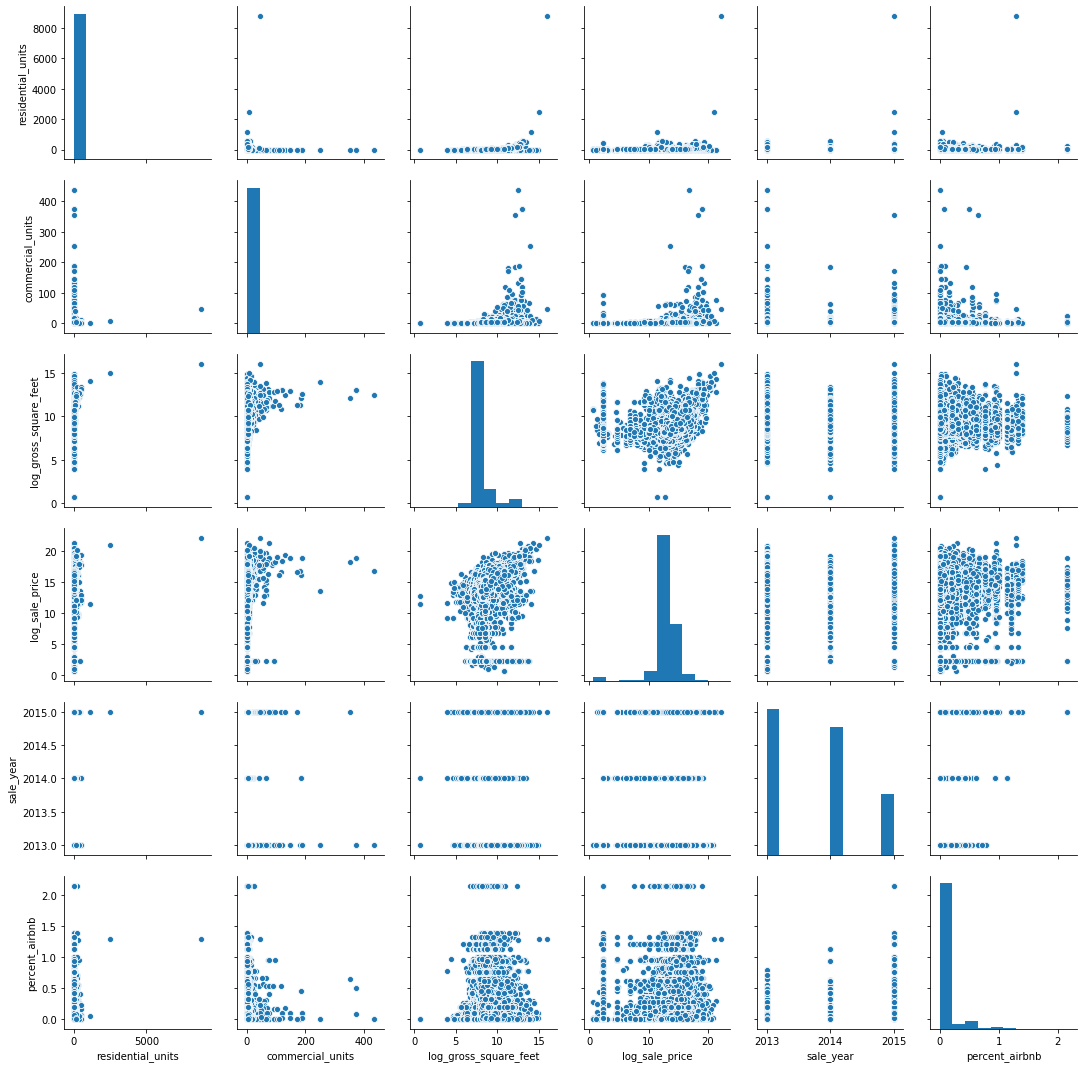

In [12]:
sns.pairplot(data=df)

## Dummify Factor Variables:

In [13]:
#Dummify Factor Variables:
neighborhood = pd.get_dummies(df.neighborhood, drop_first=True)
df = df.drop('neighborhood', axis=1)
df = pd.concat([df, neighborhood], axis=1)

building_class_category = pd.get_dummies(df.building_class_category, drop_first=True)
df = df.drop('building_class_category', axis=1)
df = pd.concat([df, building_class_category], axis=1)

tax_class = pd.get_dummies(df.tax_class, drop_first=True)
df = df.drop('tax_class', axis=1)
df = pd.concat([df, tax_class], axis=1)

decade_built = pd.get_dummies(df.decade_built, drop_first=True)
df = df.drop('decade_built', axis=1)
df = pd.concat([df, decade_built], axis=1)

sale_year = pd.get_dummies(df.sale_year, drop_first=True)
df = df.drop('sale_year', axis=1)
df = pd.concat([df, sale_year], axis=1)

## Correlation:

In [14]:
df.corr()

#Correlation
#Gross_Square_Feet:. 22.14% Correlation between Gross_Square_Feet and Home Sale Price
#Commerical_Units: 7.12% Correlation between Commerical_Units and Home Sale Price
#Airbnb: 6.66% Correlation between Airbnb Concentration and Home Sale Price
#Residential_Units: 8.95% Correlation between Residential_Units and Home Sale Price

,residential_units,commercial_units,log_gross_square_feet,log_sale_price,percent_airbnb,ALPHABET CITY,ANNADALE,ARDEN HEIGHTS,ARROCHAR,ARROCHAR-SHORE ACRES,...,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,2014,2015
residential_units,1.000000,0.037158,0.192254,0.089539,0.038007,0.010435,-0.004191,-0.006059,-0.001897,-0.001347,...,-0.003563,-0.004608,0.005511,0.001270,-0.004737,-0.004160,-0.019355,0.007156,-0.016099,0.009327
commercial_units,0.037158,1.000000,0.221433,0.071151,0.052852,0.003651,-0.004817,-0.006635,-0.001289,-0.001702,...,-0.019717,-0.013582,-0.004016,-0.004586,0.010588,-0.005915,0.043887,-0.001255,-0.039349,0.002763
log_gross_square_feet,0.192254,0.221433,1.000000,0.109330,0.317392,0.032014,-0.010842,-0.037323,-0.009267,-0.006041,...,-0.126950,-0.114201,-0.040388,-0.013690,-0.023745,-0.030567,0.462063,0.016780,-0.152518,-0.026997
log_sale_price,0.089539,0.071151,0.109330,1.000000,0.066572,0.037356,0.001645,-0.018431,-0.002579,-0.001914,...,-0.017775,-0.004471,-0.003264,0.004734,-0.002920,-0.014212,-0.143346,0.036128,0.001228,0.049335
percent_airbnb,0.038007,0.052852,0.317392,0.066572,1.000000,0.071028,-0.020112,-0.026106,-0.006845,-0.004821,...,-0.090791,-0.094843,-0.077860,-0.046884,-0.039401,-0.024659,0.154638,-0.020006,-0.016028,0.221610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990s,-0.004160,-0.005915,-0.030567,-0.014212,-0.024659,0.000649,0.027974,0.125268,0.030647,0.023337,...,-0.044673,-0.047328,-0.039371,-0.025762,-0.023485,1.000000,-0.048244,-0.024720,0.035672,-0.032036
2000s,-0.019355,0.043887,0.462063,-0.143346,0.154638,-0.009916,0.011818,0.007041,0.009238,-0.005405,...,-0.087846,-0.093067,-0.077421,-0.050659,-0.046182,-0.048244,1.000000,-0.048611,-0.086695,-0.037938
2010s,0.007156,-0.001255,0.016780,0.036128,-0.020006,0.006220,0.061965,0.052691,0.000014,0.028308,...,-0.045012,-0.047688,-0.039671,-0.025958,-0.023664,-0.024720,-0.048611,1.000000,0.021999,-0.021029
2014,-0.016099,-0.039349,-0.152518,0.001228,-0.016028,-0.025276,0.014333,0.014739,0.005251,0.005929,...,0.013727,0.010792,0.021471,0.017648,0.021944,0.035672,-0.086695,0.021999,1.000000,-0.371273


# Data Modeling

## Partitioning Into Training Test Splits

In [15]:
from sklearn.model_selection import train_test_split

#Test Train Split
x_train, x_test, y_train, y_test = train_test_split(df.drop('log_sale_price', axis = 1), df.log_sale_price, test_size = .2, random_state = 0)

## Testing Linear and Random Forest Regression Models

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_train, y_train)


y_pred = linear_regression_model.predict(x_test)

In [17]:
#Analysis of Linear Regression

#R^2
print('Linear Regression R Squared:', round(linear_regression_model.score(x_test, y_test), 4))

#RMSE
linear_regression_rmse = mean_squared_error(y_pred, y_test)
linear_regression_rmse = np.sqrt(linear_regression_rmse)
print('Linear Regression RMSE:', round(linear_regression_rmse,4) )


Linear Regression R Squared: 0.2083
Linear Regression RMSE: 1.7693


In [18]:
#Percentage True Value Within RMSE
near_true_value = np.where( 
    (y_pred <= y_test*(1 + linear_regression_rmse)) & (y_pred >= y_test*(1-linear_regression_rmse)), 1, 0)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Near_True_Value': near_true_value})

#% of Predictions within the RMSE of the True Value
print('Percent near True Value: ', round( (results.Near_True_Value == 1).sum()/len(results),4))

Percent near True Value:  0.9788


### Random Forest Regression

In [19]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest_regression = RandomForestRegressor(random_state = 0)
random_forest_regression.fit(x_train, y_train)

y_pred = random_forest_regression.predict(x_test)

In [20]:
#Analysis of Random Forest

#R^2
print('Random Forest R Squared:', round(random_forest_regression.score(x_test, y_test), 4))

#RMSE
random_forest_rmse = mean_squared_error(y_pred, y_test)
random_forest_rmse = np.sqrt(random_forest_rmse)
print('Random Forest RMSE:', round(random_forest_rmse,4) )

Random Forest R Squared: 0.4695
Random Forest RMSE: 1.4483


In [21]:
#Percentage True Value Within RMSE
near_true_value = np.where( 
    (y_pred <= y_test*(1 + random_forest_rmse)) & (y_pred >= y_test*(1-random_forest_rmse)), 1, 0)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Near_True_Value': near_true_value})

#% of Predictions within the RMSE of the True Value
print('Percent near True Value: ', round( (results.Near_True_Value == 1).sum()/len(results),4))

Percent near True Value:  0.9839


### Observing Coefficients (From Linear Regression)

In [22]:
betas = np.exp(linear_regression_model.coef_)
pd.DataFrame(betas, x_train.columns, columns=['coef'])

,coef
residential_units,1.000362
commercial_units,1.005218
log_gross_square_feet,1.705661
percent_airbnb,1.093332
ALPHABET CITY,1.961953
...,...
1990s,1.977545
2000s,1.970024
2010s,3.416954
2014,1.149494


In [23]:
#Standard Deviation for Percent Airbnb
df.percent_airbnb.std()

0.21159336422836286

In [24]:
#Mean Value for percent_airbnb
np.mean(df.percent_airbnb)

0.08013553428847217

## Conclusion
- Although the Coefficients for percent_airbnb is large *~1.10* (110% increase in sale price), its important to note that the average percentage is only *0.08 percent*, so to have airbnb_percentage increase by *1 percentage point* is huge (nearly *13x the average*). 

- To better represent the mean airbnb_percentage *(.08)*, we will use standard deviation to display the findings. Viewing in terms of Standard Deviation for Percent Airbnb, increasing *1 standard deviation* for percent_airbnb *(~0.21 percetnage points)* results in about 0.231 *(23.1%)* increase in sale price.